<div class="row">
  <div class="col-sm-8">
     <center>
        <h1>
        <img src="https://s3-eu-west-1.amazonaws.com/assets.atout-on-line.com/images/ingenieur/Fiches_Ecoles/telecom_paristech.jpg" alt="drawing" width="200"/>
            <br><br>
        IA 716 - Computer Vision<br>
        Projet 1
        <hr class="bg-light" />
            <i>Alexandre LE BRIS<br></i>
            <i>MS IA - 21/22<br></i>
        </h1>
    </center>
  </div>
          
  </div>
</div>

***
***

## Import packages

In [14]:
import numpy as np

import matplotlib.pyplot as plt

from torchvision.datasets import MNIST, SVHN
from torchvision import transforms
import torch
from torch.utils.data import DataLoader

## Import data

In [7]:
def normalize(data_tensor):
    """re-scale image values to [-1, 1]"""
    return (data_tensor / 255.0) * 2.0 - 1.0


def tile_image(image):
    """duplicate along channel axis"""
    return image.repeat(3, 1, 1)


transform_list = [transforms.ToTensor(),
                  transforms.Lambda(lambda x: normalize(x))]

mnist_dataset = MNIST(root="data", train=True, download=True,
    transform=transforms.Compose(transform_list+[transforms.ToPILImage(),
                                                 transforms.Resize(32),  # resize to [32,32]
                                                 transforms.ToTensor(),
                                                 transforms.Lambda(lambda x: tile_image(x))]))

svhn_dataset = SVHN(root="data", split="train", download=True,
                    transform=transforms.Compose(transform_list))

Using downloaded and verified file: data/train_32x32.mat


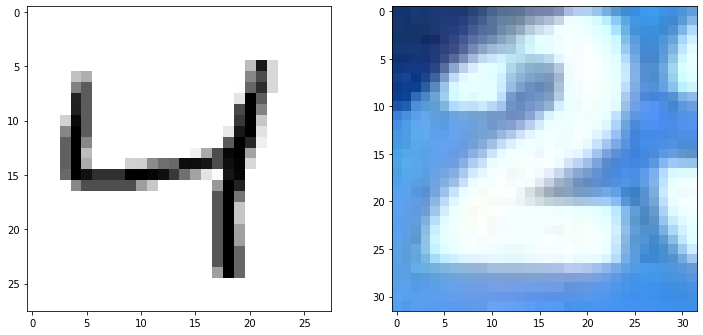

In [30]:
N = 2
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
ax[0].imshow(mnist_dataset.data[N], cmap='binary')
ax[1].imshow(svhn_dataset.data[N].transpose((1, 2, 0)))
plt.show()